In [201]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

In [93]:
labels = ['NO', 'DH', 'SL']
data = np.loadtxt('hw2/spine-data.txt', converters={6: lambda s: labels.index(s)})

In [ ]:
#data.view()
X = data[:, :5].reshape(310, 5)
Y = data[:, 6].reshape(310, 1)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 60/310, random_state=42)
#X_test.reshape(60,5)
#y_test.reshape(60,1)

In [112]:
neighbors_1 = KNeighborsClassifier(p=1).fit(X_train, y_train)
neighbors_2 = KNeighborsClassifier(p=2).fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [133]:
y_pred_1 = neighbors_1.predict(X_test)
y_pred_2 = neighbors_2.predict(X_test)
acc_1 = accuracy_score(y_test, y_pred_1)
acc_2 = accuracy_score(y_test, y_pred_2)

In [134]:
cm_1 = confusion_matrix(y_test, y_pred_1)
cm_2 = confusion_matrix(y_test, y_pred_2)
print("model with l1 norm error rate: ", 1 - acc_1)
print("model with l2 norm error rate: ", 1 - acc_2)

model with l1 norm error rate:  0.31666666666666665
model with l2 norm error rate:  0.2833333333333333


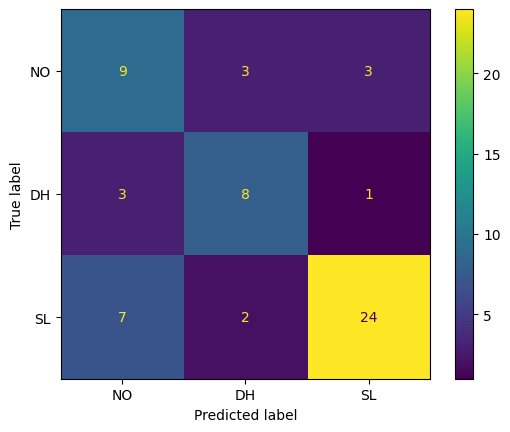

In [129]:
cm_1_disp = ConfusionMatrixDisplay(cm_1, display_labels=['NO', 'DH', 'SL'])
cm_1_disp.plot()
plt.show()

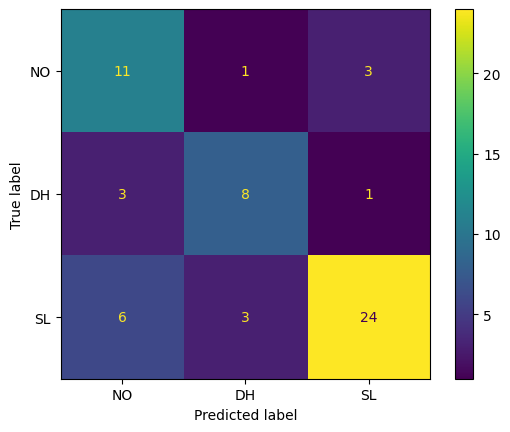

In [130]:
cm_2_disp = ConfusionMatrixDisplay(cm_2, display_labels=['NO', 'DH', 'SL'])
cm_2_disp.plot()
plt.show()

In [144]:
!pip install pandas

In [191]:
wine_data = np.loadtxt('hw2/wine.csv', delimiter=',')
x_wine = wine_data[:, 1:]
y_wine = wine_data[:, :1]

In [192]:
all_train_model = KNeighborsClassifier(n_neighbors=1)
all_train_model.fit(x_wine, y_wine)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
predictions = []
actual_values = []
loov = LeaveOneOut()
loov.get_n_splits(x_wine)

for i, (train_index, test_index) in enumerate(loov.split(x_wine)):
    #print(f"Fold {i}:")
    #print(f"  Train: index={train_index}")
    #print(f"  Test:  index={test_index}")
    X_train, X_test = x_wine[train_index], x_wine[test_index]
    y_train, y_test = y_wine[train_index], y_wine[test_index]
    
    all_train_model.fit(X_train, y_train)
    
    y_pred = all_train_model.predict(X_test)
    
    predictions.append(y_pred[0])
    actual_values.append(y_test[0])

In [208]:
print("LOOCV accuracy: ", accuracy_score(actual_values, predictions))

LOOCV accuracy:  0.7696629213483146


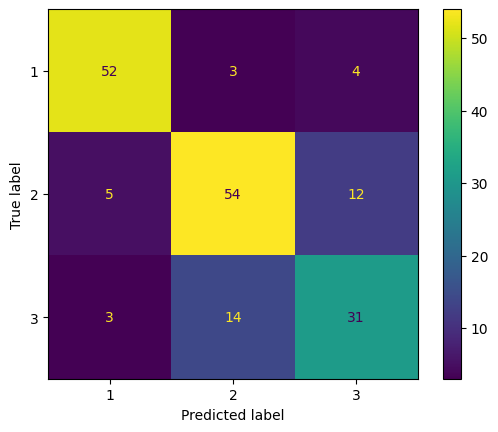

In [209]:
all_model_cm = confusion_matrix(actual_values, predictions)
cm_disp = ConfusionMatrixDisplay(all_model_cm, display_labels=['1', '2', '3'])
cm_disp.plot()

In [ ]:
kfold = list(range(2, 100, 5))
kfold_acc = []
for i in range(2, 100, 5):
    kf = KFold(n_splits=i)
    for i, (train_index, test_index) in enumerate(kf.split(x_wine)):
        #print(f"Fold {i}:")
        #print(f"  Train: index={train_index}")
        #print(f"  Test:  index={test_index}")
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        all_train_model.fit(X_train, y_train)
        
        y_pred = all_train_model.predict(X_test)
        
        predictions.append(y_pred[0])
        actual_values.append(y_test[0])
        
    kfold_acc.append(accuracy_score(actual_values, predictions))

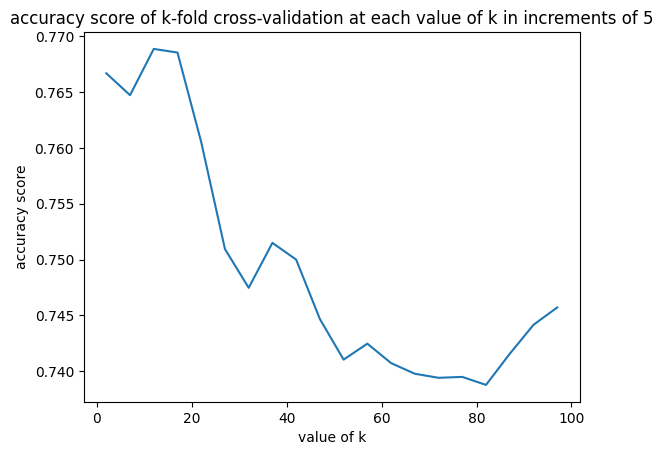

In [214]:
plt.plot(kfold, kfold_acc)
plt.xlabel('value of k')
plt.ylabel('accuracy score')
plt.title('accuracy score of k-fold cross-validation at each value of k in increments of 5')
plt.show()

In [226]:
x_data = wine_data[:, 1:]
normalized_wine = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
print(normalized_wine)
X = normalized_wine
y = wine_data[:, :1]
normalized_model = KNeighborsClassifier(n_neighbors=1)
#normalized_model.fit(X, y)

[[8.39350664e-03 9.40548971e-04 1.36915357e-03 ... 5.41708585e-04
  2.25612696e-03 6.33900242e-01]
 [7.78036396e-03 9.82218862e-04 1.19652116e-03 ... 5.47661426e-04
  1.94657920e-03 6.24970980e-01]
 [7.75655259e-03 1.32748367e-03 1.51202176e-03 ... 5.35755743e-04
  1.80966384e-03 7.05334341e-01]
 ...
 [7.82203385e-03 2.47042926e-03 1.26795526e-03 ... 2.73830713e-04
  8.51256347e-04 4.96984886e-01]
 [7.76250543e-03 1.46439903e-03 1.33343652e-03 ... 2.79783555e-04
  8.86973397e-04 4.99961307e-01]
 [8.33397822e-03 2.36327811e-03 1.55369165e-03 ... 2.85736396e-04
  8.75067714e-04 3.33281742e-01]]


In [ ]:
predictions = []
actual_values = []
loov = LeaveOneOut()
loov.get_n_splits(X)

for i, (train_index, test_index) in enumerate(loov.split(X)):
    #print(f"Fold {i}:")
    #print(f"  Train: index={train_index}")
    #print(f"  Test:  index={test_index}")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    normalized_model.fit(X_train, y_train)
    
    y_pred = normalized_model.predict(X_test)
    
    predictions.append(y_pred[0])
    actual_values.append(y_test[0])

In [228]:
accuracy_score(actual_values, predictions)

0.7696629213483146

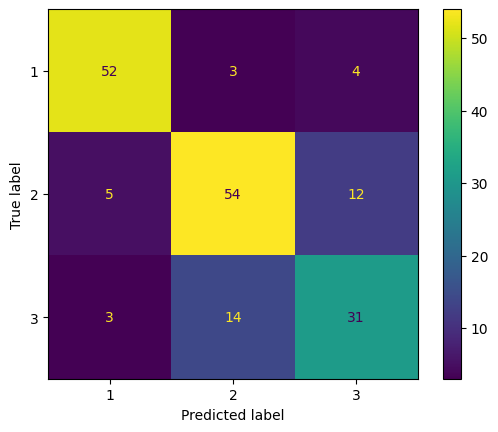

In [230]:
normalized_cm = confusion_matrix(actual_values, predictions)
cm_disp = ConfusionMatrixDisplay(normalized_cm, display_labels=['1', '2', '3'])
cm_disp.plot()

# The accuracy score seems to be about the same with the normalization.